# Báo cáo đồ án Toán Ứng Dụng Và Thống kê

In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas.util.testing as tm
import sys

# Data Overview


Cho tập dữ liệu về một trang mua bán xe hơi cũ. Tập dữu liệu sẽ gồm 2 phần: X sẽ gồm các thông tin về xe, Phần Y là giá mua bán xe.

### Dữ liệu trong Phần X được mô tả như sau:

In [9]:
df = pd.read_csv("X_train.csv")
df.head()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,...,False,True,False,False,False,True,False,False,True,True
1,2,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,...,False,True,False,False,False,False,False,False,False,False
2,3,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,...,False,True,False,True,False,False,True,True,True,False
3,4,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,...,False,True,True,False,False,False,False,False,True,True
4,5,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,...,False,False,False,False,False,False,False,False,False,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              30000 non-null  int64  
 1   manufacturer    30000 non-null  object 
 2   model           30000 non-null  object 
 3   transmission    30000 non-null  object 
 4   color           30000 non-null  object 
 5   odometer        30000 non-null  int64  
 6   year            30000 non-null  int64  
 7   engineFuel      30000 non-null  object 
 8   engineType      30000 non-null  object 
 9   engineCapacity  29991 non-null  float64
 10  bodyType        30000 non-null  object 
 11  drivetrain      30000 non-null  object 
 12  photos          30000 non-null  int64  
 13  feature_0       30000 non-null  bool   
 14  feature_1       30000 non-null  bool   
 15  feature_2       30000 non-null  bool   
 16  feature_3       30000 non-null  bool   
 17  feature_4       30000 non-null 

X gồm  30,000 dòng tương ứng với thông tin của 30,000 xe được ghi lại thông qua các giao dịch và 23 cột tương ứng với 23 thuộc tính của của xe 

| Thuộc tính              | Kiểu dữ liệu | Ý nghĩa                                  |
|:------------------------|:------------:|:----------------------------------------:|
|  manufacturer           |  integer     |    Mã số định danh                       |
|  model                  |  category    |    Tên nhà sản xuất xe hơi               |
|  transmission           |  category    |    Tên mẫu xe                            |
|  color                  |  category    |    Loại hộp số                           |
|  odmeter                |  integer     |    Màu xe                                |
|  year                   |  integer     |    Số km mà xe đã đi                     |
|  engineFuel             |  category    |    Năm sản xuất                          |
|  engineType             |  category    |    Loại nhiên liệu động cơ               |
|  engineCapacity         |  float       |    Dung tích động cơ tính bằng lít       |
|  bodyType               |  category    |    Dạng thân xe                          |
|  driventrain            |  integer     |    Loại hệ thống dẫn động                |
|  photos                 |  integer     |    Số lượng hình ảnh được chụp về xe     |
|  feature0,..., feature9 |  boolean     |    Các đặc trưng khác của xe             |
| ======================= | ============ | =======================================: |

### Dũ liệu trong phần Y được mô tả như sau:


In [18]:
df_Y = pd.read_csv("Y_train.csv")
df_Y.head()

,id,price
0,1,15500.0
1,2,2800.0
2,3,16700.0
3,4,11000.0
4,5,6800.0


- id: mã số định danh
- price: giá xe tính theo USD

$\implies$ Nối 2 tập X,Y thành một tập dữ liệu thống nhất (df) nhằm mục đích phân tích dữ liệu 

In [20]:
df = df_X.set_index('id').join(df_Y.set_index('id')) # nối 2 tập dữ liệu df_X và df_Y thành một tập dữ liệu chung thông qua thuộc tính ID
df.head()

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
id,,,,,,,,,,,,,,,,,,,,,
1,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,sedan,...,True,False,False,False,True,False,False,True,True,15500.0
2,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,hatchback,...,True,False,False,False,False,False,False,False,False,2800.0
3,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,minibus,...,True,False,True,False,False,True,True,True,False,16700.0
4,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,minibus,...,True,True,False,False,False,False,False,True,True,11000.0
5,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,sedan,...,False,False,False,False,False,False,False,False,True,6800.0


Trên đây là 5 mẫu dữ liệu của tập dữ liệu **df** bao gồm cả 2 phần thuộc tính (X) và giá xe (Y) đã được đọc từ file X_train.csv và file y_train.csv

# Data Preprocessing 

### 1. Check null values

In [16]:
df.isnull().sum() # hàm xác định số lượng trường dữ liệu bị thiếu ở mỗi cột

id                0
manufacturer      0
model             0
transmission      0
color             0
odometer          0
year              0
engineFuel        0
engineType        0
engineCapacity    0
bodyType          0
drivetrain        0
photos            0
feature_0         0
feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
dtype: int64

Đa số các thuộc tính đều khộng bị **Missing data** trừ cột **engineCapacity** bị thiếu dữ liệu ở 9 dòng

In [14]:
df['engineCapacity'].fillna(df['engineCapacity'].median(),inplace = True)


Vì số lượng dữ liệu bị thiếu là rất nhỏ nên ta thay thế các giá trị bị thiếu trong cột **engineCapacity** bằng giá trị Median của những mẫu dữ liệu đang có


In [15]:
df.isnull().sum()

id                0
manufacturer      0
model             0
transmission      0
color             0
odometer          0
year              0
engineFuel        0
engineType        0
engineCapacity    0
bodyType          0
drivetrain        0
photos            0
feature_0         0
feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
dtype: int64

### 2. Check duplicate values


In [24]:
df.duplicated().sum()

25

$\implies$ trong tập dữ liệu này có 25 trường dữ liệu bị trùng lắp nhau


In [33]:
duplicated_df = df[df.duplicated()]
duplicated_df

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
id,,,,,,,,,,,,,,,,,,,,,
4242,Skoda,Octavia,mechanical,grey,159000,2009,gasoline,gasoline,1.8,universal,...,False,False,False,False,False,False,False,False,False,8000.0
7808,Renault,19,mechanical,blue,99999,1992,gasoline,gasoline,1.7,sedan,...,False,False,False,False,False,False,False,False,False,10.0
9005,Volkswagen,Golf,mechanical,grey,149000,2015,diesel,diesel,1.6,universal,...,True,False,False,False,True,True,False,True,True,12600.0
9343,Renault,Fluence,mechanical,black,167817,2011,diesel,diesel,1.5,sedan,...,True,False,False,False,False,False,False,True,True,8500.0
10191,Hyundai,Atos,mechanical,silver,150000,2004,gasoline,gasoline,1.1,hatchback,...,False,False,False,False,False,False,False,False,False,3300.0
12817,Citroen,Xantia,mechanical,silver,520000,1998,diesel,diesel,2.1,universal,...,True,False,False,False,False,False,False,False,False,1000.0
13213,Volvo,850,mechanical,blue,300000,1994,diesel,diesel,2.0,sedan,...,True,False,False,True,True,False,False,True,True,2350.0
14585,Audi,A4,mechanical,blue,325000,2002,diesel,diesel,2.5,universal,...,False,False,False,False,False,False,False,False,False,5650.0
14847,Daewoo,Matiz,mechanical,other,221000,2006,gasoline,gasoline,1.0,hatchback,...,False,False,False,False,False,False,False,False,False,950.0


Bảng dữ liệu ở trên là danh sách 25 hàng dữ liệu bị trùng lắp (đã loại bỏ hàng dữ liệu mà đã suất hiện trước đó) 

$\implies$ Ta tiến hành xóa các hàng dữ liệu này

In [38]:
df.drop_duplicates(inplace=True,ignore_index=True)
df

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
0,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,sedan,...,True,False,False,False,True,False,False,True,True,15500.0
1,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,hatchback,...,True,False,False,False,False,False,False,False,False,2800.0
2,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,minibus,...,True,False,True,False,False,True,True,True,False,16700.0
3,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,minibus,...,True,True,False,False,False,False,False,True,True,11000.0
4,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,sedan,...,False,False,False,False,False,False,False,False,True,6800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29970,Acura,TSX,automatic,black,252000,2008,gasoline,gasoline,2.4,sedan,...,True,True,False,True,True,False,True,True,True,9500.0
29971,Ford,Mondeo,mechanical,red,290000,1997,gasoline,gasoline,1.8,sedan,...,False,False,False,False,False,False,False,False,False,1750.0
29972,Mitsubishi,Galant,mechanical,grey,250000,1993,gasoline,gasoline,2.0,hatchback,...,False,False,False,False,False,False,False,False,True,1400.0
29973,Opel,Astra,mechanical,silver,267000,2002,diesel,diesel,1.7,universal,...,True,False,False,False,False,False,False,False,True,3700.0


# Data visualization

### 1. price 

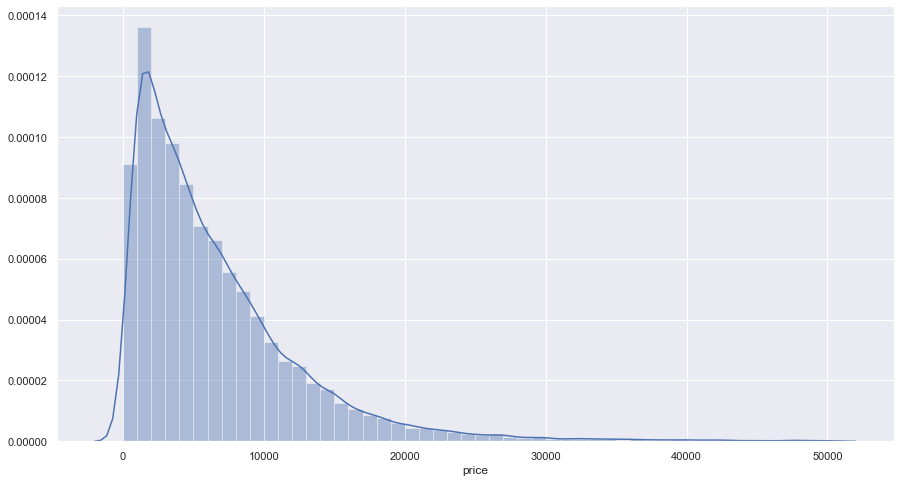

In [11]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['price'])

$\implies$ từ biểu đồ historgram ta nhận thấy được rằng class price của tập dữ liệu khá lệch 